## *Análise de curto prazo*


In [2]:
# bibliotecas usadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Planilhas carregadas: ['Ativo', 'Passivo', 'DRE', 'DFC']

ANÁLISE COMPLETA DO CURTO PRAZO - EMBRAER

--- Extraindo dados para análise do curto prazo ---
✓ Disponivel encontrado
✓ AplicacoesFinanceiras encontrado
✓ ContasReceber encontrado
✓ Estoques encontrado
✓ AtivoCirculante encontrado
✓ AtivoTotal encontrado
✓ EmprestimosFinanciamentosCP encontrado
✓ Fornecedores encontrado
✓ ObrigacoesTrabalhistas encontrado
✓ PassivoCirculante encontrado
✓ PassivoNaoCirculante encontrado
✓ PatrimonioLiquido encontrado
✓ ReceitaLiquida encontrado
✓ CustoMercadoriasVendidas encontrado

--- Calculando Indicadores de Liquidez ---
--- Calculando Capital Circulante Líquido ---
--- Calculando NCG e Saldo de Tesouraria ---
--- Calculando Composição do Circulante ---
--- Gerando Gráfico do Efeito Tesoura ---


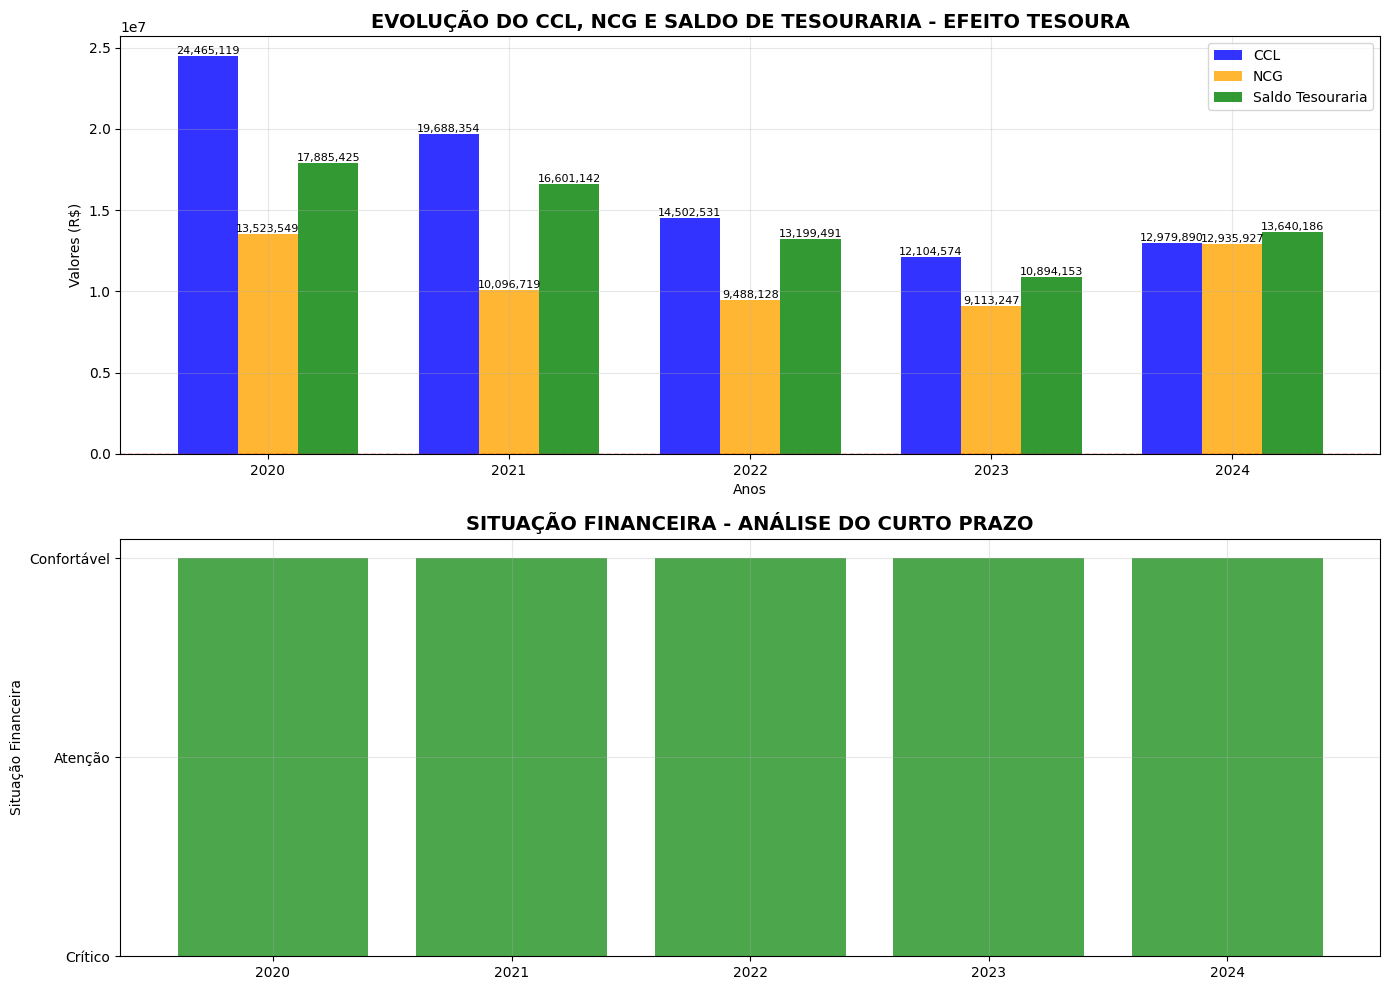

--- Gerando Gráfico do Efeito Tesoura ---


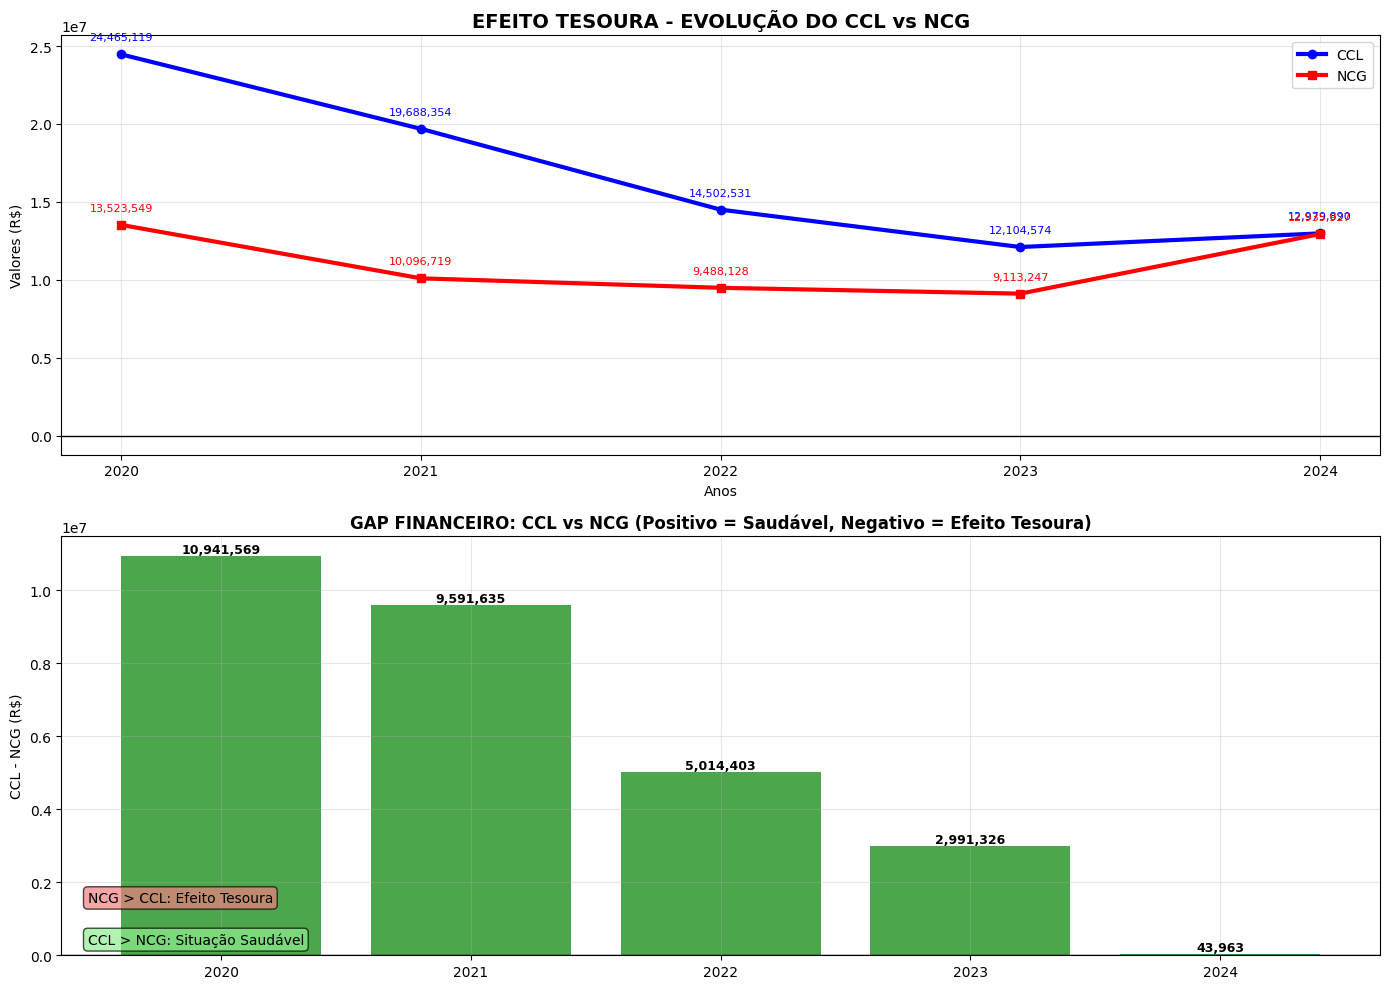


--- Análise Detalhada do Efeito Tesoura ---

2020:
  CCL: R$ 24,465,118.76
  NCG: R$ 13,523,549.34
  GAP (CCL-NCG): R$ 10,941,569.43
  Situação: SITUAÇÃO CONFORTÁVEL - CCL > NCG
  Recomendação: Empresa com boa saúde financeira, CCL cobre NCG

2021:
  CCL: R$ 19,688,354.09
  NCG: R$ 10,096,719.09
  GAP (CCL-NCG): R$ 9,591,635.00
  Situação: SITUAÇÃO CONFORTÁVEL - CCL > NCG
  Recomendação: Empresa com boa saúde financeira, CCL cobre NCG

2022:
  CCL: R$ 14,502,530.98
  NCG: R$ 9,488,128.31
  GAP (CCL-NCG): R$ 5,014,402.67
  Situação: SITUAÇÃO CONFORTÁVEL - CCL > NCG
  Recomendação: Empresa com boa saúde financeira, CCL cobre NCG

2023:
  CCL: R$ 12,104,573.76
  NCG: R$ 9,113,247.33
  GAP (CCL-NCG): R$ 2,991,326.43
  Situação: SITUAÇÃO CONFORTÁVEL - CCL > NCG
  Recomendação: Empresa com boa saúde financeira, CCL cobre NCG

2024:
  CCL: R$ 12,979,890.00
  NCG: R$ 12,935,927.00
  GAP (CCL-NCG): R$ 43,963.00
  Situação: SITUAÇÃO CONFORTÁVEL - CCL > NCG
  Recomendação: Empresa com boa saúde 

In [9]:
# Configuração para melhor visualização
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)

def analise_curto_prazo_completa():
    """
    ANÁLISE COMPLETA DO CURTO PRAZO
    Indicadores de liquidez, CCL, NCG, ST, Ativos/Passivos Circulantes e Efeito Tesoura
    """
    
    # Carregar as demonstrações contábeis
    try:
        demonstracoes = pd.read_excel('D:\\{estudos}\\Python\\ADC - Embraer S.A\\Analise-Embraer\\Demonstrações_Embraer_Ajustado.xlsm', sheet_name=None)
        print("Planilhas carregadas:", list(demonstracoes.keys()))
    except Exception as e:
        print(f"Erro ao carregar arquivo: {e}")
        return
    
    if not demonstracoes:
        print("Erro: Nenhuma demonstração carregada")
        return
    
    df_ativo = demonstracoes.get('Ativo')
    df_passivo = demonstracoes.get('Passivo')
    df_dre = demonstracoes.get('DRE')
    
    if df_ativo is None or df_passivo is None:
        print("Erro: Planilhas de Ativo ou Passivo não encontradas")
        return
    
    print("\n" + "="*80)
    print("ANÁLISE COMPLETA DO CURTO PRAZO - EMBRAER")
    print("="*80)
    
    # Contas para análise do curto prazo
    contas_chave = {
        # Ativo Circulante
        "Disponivel": (df_ativo, "1.01.01"),
        "AplicacoesFinanceiras": (df_ativo, "1.01.02"),
        "ContasReceber": (df_ativo, "1.01.03"),
        "Estoques": (df_ativo, "1.01.04"),
        "AtivoCirculante": (df_ativo, "1.01"),
        "AtivoTotal": (df_ativo, "1"),
        
        # Passivo Circulante
        "EmprestimosFinanciamentosCP": (df_passivo, "2.01.01"),
        "Fornecedores": (df_passivo, "2.01.02"),
        "ObrigacoesTrabalhistas": (df_passivo, "2.01.03"),
        "PassivoCirculante": (df_passivo, "2.01"),
        "PassivoNaoCirculante": (df_passivo, "2.02"),
        "PatrimonioLiquido": (df_passivo, "2.03"),
        
        # DRE para cálculos
        "ReceitaLiquida": (df_dre, "3.01"),
        "CustoMercadoriasVendidas": (df_dre, "3.02")
    }
    
    # Extrair anos das colunas
    anos = [col for col in df_ativo.columns if isinstance(col, (int, float))]
    base_data = pd.DataFrame(index=contas_chave.keys(), columns=anos)
    
    print("\n--- Extraindo dados para análise do curto prazo ---")
    for nome, (df, codigo) in contas_chave.items():
        if df is not None:
            linha = df[df['CD_CONTA'] == str(codigo)]
            if not linha.empty:
                valores = linha.iloc[0][anos]
                base_data.loc[nome] = valores
                print(f"✓ {nome} encontrado")
            else:
                print(f"✗ {nome} não encontrado - preenchido com 0")
                base_data.loc[nome] = 0
    
    # Calcular totais e componentes
    base_data.loc['AtivosFinanceirosCP'] = base_data.loc['Disponivel'] + base_data.loc['AplicacoesFinanceiras']
    base_data.loc['AtivosCiclicosCP'] = base_data.loc['ContasReceber'] + base_data.loc['Estoques']
    base_data.loc['PassivosFinanceirosCP'] = base_data.loc['EmprestimosFinanciamentosCP']
    base_data.loc['PassivosCiclicosCP'] = base_data.loc['Fornecedores'] + base_data.loc['ObrigacoesTrabalhistas']
    base_data.loc['AtivoNaoCirculante'] = base_data.loc['AtivoTotal'] - base_data.loc['AtivoCirculante']
    
    # DataFrame para indicadores
    indicadores = pd.DataFrame(columns=anos)
    
    # =========================================================================
    # 1. INDICADORES DE LIQUIDEZ
    # =========================================================================
    
    print("\n--- Calculando Indicadores de Liquidez ---")
    
    # Liquidez Imediata
    indicadores.loc['Liquidez Imediata'] = base_data.loc['AtivosFinanceirosCP'] / base_data.loc['PassivoCirculante']
    
    # Liquidez Seca
    indicadores.loc['Liquidez Seca'] = (base_data.loc['AtivoCirculante'] - base_data.loc['Estoques']) / base_data.loc['PassivoCirculante']
    
    # Liquidez Corrente
    indicadores.loc['Liquidez Corrente'] = base_data.loc['AtivoCirculante'] / base_data.loc['PassivoCirculante']
    
    # =========================================================================
    # 2. CAPITAL CIRCULANTE LÍQUIDO (CCL)
    # =========================================================================
    
    print("--- Calculando Capital Circulante Líquido ---")
    
    # CCL Método 1: AC - PC
    indicadores.loc['CCL (AC - PC)'] = base_data.loc['AtivoCirculante'] - base_data.loc['PassivoCirculante']
    
    # CCL Método 2: (PL + PNC) - ANC
    indicadores.loc['CCL (PL+PNC-ANC)'] = (base_data.loc['PatrimonioLiquido'] + base_data.loc['PassivoNaoCirculante']) - base_data.loc['AtivoNaoCirculante']
    
    # =========================================================================
    # 3. NECESSIDADE DE CAPITAL DE GIRO (NCG) E SALDO DE TESOURARIA (ST)
    # =========================================================================
    
    print("--- Calculando NCG e Saldo de Tesouraria ---")
    
    # NCG = Ativos Cíclicos - Passivos Cíclicos
    indicadores.loc['NCG'] = base_data.loc['AtivosCiclicosCP'] - base_data.loc['PassivosCiclicosCP']
    
    # Saldo de Tesouraria = Ativos Financeiros - Passivos Financeiros
    indicadores.loc['Saldo Tesouraria (ST)'] = base_data.loc['AtivosFinanceirosCP'] - base_data.loc['PassivosFinanceirosCP']
    
    # =========================================================================
    # 4. COMPOSIÇÃO DO ATIVO E PASSIVO CIRCULANTE
    # =========================================================================
    
    print("--- Calculando Composição do Circulante ---")
    
    # Participação percentual dos componentes
    indicadores.loc['% Disponível/AC'] = (base_data.loc['Disponivel'] / base_data.loc['AtivoCirculante']) * 100
    indicadores.loc['% Aplicações/AC'] = (base_data.loc['AplicacoesFinanceiras'] / base_data.loc['AtivoCirculante']) * 100
    indicadores.loc['% Contas Receber/AC'] = (base_data.loc['ContasReceber'] / base_data.loc['AtivoCirculante']) * 100
    indicadores.loc['% Estoques/AC'] = (base_data.loc['Estoques'] / base_data.loc['AtivoCirculante']) * 100
    
    indicadores.loc['% Empréstimos/PC'] = (base_data.loc['EmprestimosFinanciamentosCP'] / base_data.loc['PassivoCirculante']) * 100
    indicadores.loc['% Fornecedores/PC'] = (base_data.loc['Fornecedores'] / base_data.loc['PassivoCirculante']) * 100
    indicadores.loc['% Obrigações Trabalhistas/PC'] = (base_data.loc['ObrigacoesTrabalhistas'] / base_data.loc['PassivoCirculante']) * 100
    
    # =========================================================================
    # 5. GRÁFICO DO EFEITO TESOURA
    # =========================================================================
    
    print("--- Gerando Gráfico do Efeito Tesoura ---")
    
    # Preparar dados para o gráfico
    anos_grafico = [str(ano) for ano in anos]
    ccl = indicadores.loc['CCL (AC - PC)'].values
    ncg = indicadores.loc['NCG'].values
    st = indicadores.loc['Saldo Tesouraria (ST)'].values
    
    # Criar gráfico do Efeito Tesoura
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    # Gráfico 1: Evolução dos componentes
    width = 0.25
    x_indexes = np.arange(len(anos_grafico))
    
    ax1.bar(x_indexes - width, ccl, width, label='CCL', alpha=0.8, color='blue')
    ax1.bar(x_indexes, ncg, width, label='NCG', alpha=0.8, color='orange')
    ax1.bar(x_indexes + width, st, width, label='Saldo Tesouraria', alpha=0.8, color='green')
    
    ax1.set_xlabel('Anos')
    ax1.set_ylabel('Valores (R$)')
    ax1.set_title('EVOLUÇÃO DO CCL, NCG E SALDO DE TESOURARIA - EFEITO TESOURA', fontsize=14, fontweight='bold')
    ax1.set_xticks(x_indexes)
    ax1.set_xticklabels(anos_grafico)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.axhline(y=0, color='red', linestyle='--', linewidth=1)
    
    # Adicionar valores nas barras
    for i, v in enumerate(ccl):
        ax1.text(i - width, v, f'{v:,.0f}', ha='center', va='bottom' if v >= 0 else 'top', fontsize=8)
    for i, v in enumerate(ncg):
        ax1.text(i, v, f'{v:,.0f}', ha='center', va='bottom' if v >= 0 else 'top', fontsize=8)
    for i, v in enumerate(st):
        ax1.text(i + width, v, f'{v:,.0f}', ha='center', va='bottom' if v >= 0 else 'top', fontsize=8)
    
    # Gráfico 2: Análise da situação financeira
    situacoes = []
    for i in range(len(anos)):
        if ccl[i] > 0 and st[i] >= 0:
            situacoes.append(2)  # Confortável
        elif ccl[i] > 0 and st[i] < 0:
            situacoes.append(1)  # Atenção
        else:
            situacoes.append(0)  # Crítico
    
    cores_situacao = ['red', 'orange', 'green']
    labels_situacao = ['Crítico', 'Atenção', 'Confortável']
    
    ax2.bar(anos_grafico, situacoes, color=[cores_situacao[s] for s in situacoes], alpha=0.7)
    ax2.set_ylabel('Situação Financeira')
    ax2.set_title('SITUAÇÃO FINANCEIRA - ANÁLISE DO CURTO PRAZO', fontsize=14, fontweight='bold')
    ax2.set_yticks([0, 1, 2])
    ax2.set_yticklabels(labels_situacao)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('Efeito_Tesoura_Embraer.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # =========================================================================
    # GRÁFICO DO EFEITO TESOURA LINEAR COM ÁREA SOMBREADA
    # =========================================================================
    
    print("--- Gerando Gráfico do Efeito Tesoura ---")
    
    # Preparar dados para o gráfico
    anos_grafico = [str(ano) for ano in anos]
    ccl = indicadores.loc['CCL (AC - PC)'].values
    ncg = indicadores.loc['NCG'].values
    st = indicadores.loc['Saldo Tesouraria (ST)'].values
    
    # Criar gráfico do Efeito Tesoura
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    # Gráfico 1: Evolução LINEAR com área sombreada do Efeito Tesoura
    ax1.plot(anos_grafico, ccl, marker='o', linewidth=3, label='CCL', color='blue')
    ax1.plot(anos_grafico, ncg, marker='s', linewidth=3, label='NCG', color='red')
    
    # Destacar áreas onde NCG > CCL (Efeito Tesoura)
    for i in range(len(anos_grafico)):
        if ncg[i] > ccl[i]:
            ax1.axvspan(i-0.3, i+0.3, alpha=0.3, color='red', label='Efeito Tesoura' if i == 0 else "")
    
    ax1.set_xlabel('Anos')
    ax1.set_ylabel('Valores (R$)')
    ax1.set_title('EFEITO TESOURA - EVOLUÇÃO DO CCL vs NCG', fontsize=14, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.axhline(y=0, color='black', linestyle='-', linewidth=1)
    
    # Adicionar valores nos pontos
    for i, (ccl_val, ncg_val, st_val) in enumerate(zip(ccl, ncg, st)):
        ax1.annotate(f'{ccl_val:,.0f}', (i, ccl_val), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='blue')
        ax1.annotate(f'{ncg_val:,.0f}', (i, ncg_val), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')
    
    # Gráfico 2: Diferença CCL - NCG (mostra o gap do Efeito Tesoura)
    diferenca = ccl - ncg
    cores_diferenca = ['green' if diff >= 0 else 'red' for diff in diferenca]
    
    bars = ax2.bar(anos_grafico, diferenca, color=cores_diferenca, alpha=0.7)
    ax2.set_ylabel('CCL - NCG (R$)')
    ax2.set_title('GAP FINANCEIRO: CCL vs NCG (Positivo = Saudável, Negativo = Efeito Tesoura)', 
                 fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
    
    # Adicionar valores nas barras
    for bar, diff in zip(bars, diferenca):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{diff:,.0f}',
                ha='center', va='bottom' if height >= 0 else 'top', 
                fontsize=9, fontweight='bold')
    
   # Adicionar legendas para o Efeito Tesoura na parte INFERIOR
    ax2.text(0.02, 0.02, 'CCL > NCG: Situação Saudável', transform=ax2.transAxes, 
            fontsize=10, verticalalignment='bottom', horizontalalignment='left', 
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
    ax2.text(0.02, 0.12, 'NCG > CCL: Efeito Tesoura', transform=ax2.transAxes, 
            fontsize=10, verticalalignment='bottom', horizontalalignment='left', 
            bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))
    
    plt.tight_layout()
    plt.savefig('Efeito_Tesoura_Embraer.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # =========================================================================
    # 6. ANÁLISE DETALHADA DO EFEITO TESOURA
    # =========================================================================
    
    print("\n--- Análise Detalhada do Efeito Tesoura ---")
    
    analise_situacao = []
    for i, ano in enumerate(anos):
        # Análise baseada no Efeito Tesoura (NCG vs CCL)
        if ccl[i] > ncg[i] and ccl[i] > 0:
            situacao = "SITUAÇÃO CONFORTÁVEL - CCL > NCG"
            recomendacao = "Empresa com boa saúde financeira, CCL cobre NCG"
        elif ccl[i] > 0 and ncg[i] > ccl[i]:
            situacao = "EFEITO TESOURA - NCG > CCL"
            recomendacao = "Necessidade de financiamento adicional para cobrir NCG"
        elif ccl[i] <= 0:
            situacao = "SITUAÇÃO CRÍTICA - CCL negativo"
            recomendacao = "Risco de insolvência - necessidade urgente de capital"
        else:
            situacao = "SITUAÇÃO DE ATENÇÃO"
            recomendacao = "Monitorar evolução do capital de giro"
        
        analise_situacao.append({
            'Ano': ano,
            'Situacao': situacao,
            'Recomendacao': recomendacao,
            'CCL_NCG_Gap': ccl[i] - ncg[i]
        })
        
        print(f"\n{ano}:")
        print(f"  CCL: R$ {ccl[i]:,.2f}")
        print(f"  NCG: R$ {ncg[i]:,.2f}")
        print(f"  GAP (CCL-NCG): R$ {ccl[i] - ncg[i]:,.2f}")
        print(f"  Situação: {situacao}")
        print(f"  Recomendação: {recomendacao}")
    # =========================================================================
    # 7. EXPORTAR RESULTADOS COMPLETOS
    # =========================================================================
    
    print("\n--- Exportando Resultados Completos ---")
    
    # Criar DataFrame consolidado
    resultados_consolidados = pd.DataFrame({
        'Ano': anos,
        'Liquidez_Corrente': indicadores.loc['Liquidez Corrente'].values,
        'Liquidez_Seca': indicadores.loc['Liquidez Seca'].values,
        'Liquidez_Imediata': indicadores.loc['Liquidez Imediata'].values,
        'CCL_R$': indicadores.loc['CCL (AC - PC)'].values,
        'NCG_R$': indicadores.loc['NCG'].values,
        'Saldo_Tesouraria_R$': indicadores.loc['Saldo Tesouraria (ST)'].values,
        'Ativo_Circulante_R$': base_data.loc['AtivoCirculante'].values,
        'Passivo_Circulante_R$': base_data.loc['PassivoCirculante'].values,
        'Ativos_Financeiros_R$': base_data.loc['AtivosFinanceirosCP'].values,
        'Ativos_Ciclicos_R$': base_data.loc['AtivosCiclicosCP'].values,
        'Passivos_Financeiros_R$': base_data.loc['PassivosFinanceirosCP'].values,
        'Passivos_Ciclicos_R$': base_data.loc['PassivosCiclicosCP'].values
    })
    
    # Adicionar análise de situação
    df_analise = pd.DataFrame(analise_situacao)
    resultados_consolidados = resultados_consolidados.merge(df_analise, on='Ano')
    
    # Exportar para Excel
    try:
        with pd.ExcelWriter('Analise_Curto_Prazo_Embraer_Completa.xlsx') as writer:
            resultados_consolidados.to_excel(writer, sheet_name='Indicadores Principais', index=False)
            indicadores.T.to_excel(writer, sheet_name='Todos Indicadores')
            base_data.T.to_excel(writer, sheet_name='Dados Base')
            
            # Sheet com análise detalhada
            resumo_analise = pd.DataFrame({
                'Métrica': [
                    'Liquidez Corrente (ideal > 1.5)',
                    'Liquidez Seca (ideal > 1.0)',
                    'Liquidez Imediata (ideal > 0.2)',
                    'CCL (ideal > 0)',
                    'NCG (quanto menor melhor)',
                    'Saldo Tesouraria (ideal > 0)'
                ],
                'Interpretação': [
                    'Capacidade de pagar dívidas de curto prazo',
                    'Capacidade sem considerar estoques',
                    'Capacidade imediata de pagamento',
                    'Excedente de ativos circulantes',
                    'Recursos necessários para operação',
                    'Folga financeira imediata'
                ]
            })
            resumo_analise.to_excel(writer, sheet_name='Guia Interpretação', index=False)
        
        print("✓ Arquivo 'Analise_Curto_Prazo_Embraer_Completa.xlsx' exportado com sucesso!")
        print("✓ Gráfico 'Efeito_Tesoura_Embraer.png' salvo!")
        
    except Exception as e:
        print(f"Erro ao exportar arquivo: {e}")
    
    # =========================================================================
    # 8. RELATÓRIO FINAL RESUMIDO
    # =========================================================================
    
    print("\n" + "="*80)
    print("RELATÓRIO FINAL - ANÁLISE DO CURTO PRAZO")
    print("="*80)
    
    print("\n--- SÍNTESE DOS INDICADORES ---")
    ultimo_ano = anos[-1]
    print(f"\nÚltimo ano analisado ({ultimo_ano}):")
    print(f"  • Liquidez Corrente: {indicadores.loc['Liquidez Corrente', ultimo_ano]:.2f}")
    print(f"  • Liquidez Seca: {indicadores.loc['Liquidez Seca', ultimo_ano]:.2f}")
    print(f"  • Liquidez Imediata: {indicadores.loc['Liquidez Imediata', ultimo_ano]:.2f}")
    print(f"  • CCL: R$ {indicadores.loc['CCL (AC - PC)', ultimo_ano]:,.2f}")
    print(f"  • NCG: R$ {indicadores.loc['NCG', ultimo_ano]:,.2f}")
    print(f"  • Saldo Tesouraria: R$ {indicadores.loc['Saldo Tesouraria (ST)', ultimo_ano]:,.2f}")
    
    print("\n--- COMPOSIÇÃO DO ATIVO CIRCULANTE ---")
    print(f"  • Disponível: {indicadores.loc['% Disponível/AC', ultimo_ano]:.1f}%")
    print(f"  • Contas a Receber: {indicadores.loc['% Contas Receber/AC', ultimo_ano]:.1f}%")
    print(f"  • Estoques: {indicadores.loc['% Estoques/AC', ultimo_ano]:.1f}%")
    
    print("\n--- COMPOSIÇÃO DO PASSIVO CIRCULANTE ---")
    print(f"  • Empréstimos: {indicadores.loc['% Empréstimos/PC', ultimo_ano]:.1f}%")
    print(f"  • Fornecedores: {indicadores.loc['% Fornecedores/PC', ultimo_ano]:.1f}%")
    print(f"  • Obrigações Trabalhistas: {indicadores.loc['% Obrigações Trabalhistas/PC', ultimo_ano]:.1f}%")
    
    # Recomendações finais
    print("\n--- RECOMENDAÇÕES ---")
    situacao_final = analise_situacao[-1]['Situacao']
    recomendacao_final = analise_situacao[-1]['Recomendacao']
    print(f"Situação atual: {situacao_final}")
    print(f"Recomendação: {recomendacao_final}")

# Executar a análise
if __name__ == "__main__":
    analise_curto_prazo_completa()